# Perceptron Binary Classifer

We will first import the tools we will use

In [ ]:
#Importing packages 
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns

We will define a class object for our Perceptron model. It will have key methods fit and predict. 

In [ ]:
#defining perceptron class 
class Perceptron:
    """
    This  class definition for
    preceptron algorithm. fit method learns the feature weights and bias
    relatioship to lables and the predict algorithm makes 
    prediction based on learned weights

    """
    def __init__(self, learning_rate=0.001, epochs=100):
        self.lr = learning_rate  # This is a number used to control how quickly it learns
        self.epochs = epochs   # This paramter determines the epochs of the training before stopping
        self.weights = None # these are the weights 
        self.bias = None #bias parameter 

    def fit(self, X, y):
        """
        this function will learn the weights
        input is training data and lables 
        it will learn the weights and bias 
        """
        n_samples, n_features = X.shape # we check our X shape and set the size to number of rows/samples and columns as features 
        self.weights = np.zeros(n_features) # we initilize weights to 0 initially 
        self.bias = 0 #

        y_ = np.array([1 if i > 0 else 0 for i in y]) # make sure Y values are mapped to 0, 1 , example -1, 1 
        print("Starting weights", self.weights) 
        print("Starting bias weight", self.bias)
        #loop1 over epochs 
        for _ in range(self.epochs):
            #loop2 over features  
            for idx, x_i in enumerate(X):
                #print(idx, x_i)
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output>=0, 1, 0)
                # Perceptron adjust rule
                adjustment = self.lr * (y_[idx] - y_predicted) # adjustment will be determined by comparing real y to predicted 
                self.weights += adjustment * x_i #adjust weights
                self.bias += adjustment # adjust bias
        print("Final weights", self.weights)  
        print("Final bias weight", self.bias)
        

    def predict(self, X):
        """
        this function takes Features as input
        uses weights and bias and performs the dot product and 
        activation function and outputs 0 or 1
        """
        linear_output = np.dot(X, self.weights) + self.bias # wx+b weights and features + bias 
        y_predicted = np.where(linear_output>=0, 1, 0) # activation  
        return y_predicted


We will define a basic function which can be used to check accuarcy of predictions 

In [ ]:
#function for chekcing accuracy
def acc(y_true, y_pred):
  """
  function takes 2 values, y_true and y_pred and
  worksout ration based how many correctly predicted
  returs accuracy ratio %
  """
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy


In this section we will use dummy dataset blobs from Sklean just to test our Model initially

In [ ]:
# #test data blob generator used during initial testing 
X, y = datasets.make_blobs(n_samples=150, n_features=8, centers=2, cluster_std=1.05, random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)
print(X_train.shape, y_train.shape)
print (type(X_train), type(y_train))
#using our preceptron class to fit and predict
p= Perceptron(learning_rate=0.001, epochs=150)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
print("Accuracy is : ", acc(y_test, y_pred))
#checking confusion matrix
print('confusion matrix\n', confusion_matrix(y_test, y_pred))

(120, 8) (120,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
Starting weights [0. 0. 0. 0. 0. 0. 0. 0.]
Starting bias weight 0
Final weights [-0.00035588  0.00583077 -0.00938398 -0.00430464  0.01142283  0.01001561
 -0.00363861 -0.01387817]
Final bias weight 0.0
Accuracy is :  1.0
confusion matrix
 [[17  0]
 [ 0 13]]


Model perfomed well on blob data but we need some real dataset, we will use UCI dataset for adult income prediction

In [ ]:
#Dataset from UCI adult income dataset , binary classfication of income being higher or lower-equal to 50K
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
data = pd.read_csv(url)

Adding column names to the table from the UCI website data info and perfom EDA

In [ ]:
#rename columns based data info file https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
data.columns =['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital',
       'occupation', 'relationship', 'race', 'gender', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income']

In [ ]:
#checking the dataframe 
data.head()

,age,workclass,fnlwgt,education,educational-num,marital,occupation,relationship,race,gender,capital gain,capital loss,hours per week,country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
#We will keep things simple remove most of the categorical features, apart from gender 
data.drop(['fnlwgt', 'education','country', 'relationship', 'workclass', 'marital','occupation', 'race'], axis=1, inplace=True)

In [ ]:
#check the result of dropping columns 
data.head()

,age,educational-num,gender,capital gain,capital loss,hours per week,income
0,50,13,Male,0,0,13,<=50K
1,38,9,Male,0,0,40,<=50K
2,53,7,Male,0,0,40,<=50K
3,28,13,Female,0,0,40,<=50K
4,37,14,Female,0,0,40,<=50K


In [ ]:
# we will use some quick pandas regex replace option to replace, label income with 0 for <=50K and 1 for >50K and similary for gender 0 for Male and 1 for Female
data.replace('<=50K', 0, regex=True, inplace=True)
data.replace('>50K', 1, regex=True, inplace=True)
data.replace('Male', 0, regex=True, inplace=True)
data.replace('Female', 1, regex=True, inplace=True)

In [ ]:
#check result 
data.tail()

,age,educational-num,gender,capital gain,capital loss,hours per week,income
32555,27,12,1,0,0,38,0
32556,40,9,0,0,0,40,1
32557,58,9,1,0,0,40,0
32558,22,9,0,0,0,20,0
32559,52,9,1,15024,0,40,1


In [ ]:
#checking size
data.shape

(32560, 7)

we will use this dataset to test our model, this includes 6 features 

In [ ]:
#checking data types in the frame to make sure all numbers
data.dtypes

age                int64
educational-num    int64
gender             int64
capital gain       int64
capital loss       int64
hours per week     int64
income             int64
dtype: object

In [ ]:
#checking for missing values
data.isna().sum()

age                0
educational-num    0
gender             0
capital gain       0
capital loss       0
hours per week     0
income             0
dtype: int64

In [ ]:
#checking for missing values
data.isnull().sum()

age                0
educational-num    0
gender             0
capital gain       0
capital loss       0
hours per week     0
income             0
dtype: int64

In [ ]:
#check some basic statitsic summary  on our data 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
educational-num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
gender,32560.0,0.330805,0.470510,0.0,0.0,0.0,1.0,1.0
capital gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
hours per week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0
income,32560.0,0.240817,0.427586,0.0,0.0,0.0,0.0,1.0


from the correlation data we can see "educational-num" and "age" are more correllated to income and seems like gender is negatively corrolated to income

In [ ]:
#looking at some basic correllation data
data.corr().T

,age,educational-num,gender,capital gain,capital loss,hours per week,income
age,1.000000,0.036527,-0.088832,0.077674,0.057775,0.068756,0.234039
educational-num,0.036527,1.000000,-0.012256,0.122627,0.079932,0.148127,0.335182
gender,-0.088832,-0.012256,1.000000,-0.048477,-0.045572,-0.229312,-0.215995
capital gain,0.077674,0.122627,-0.048477,1.000000,-0.031614,0.078409,0.223333
capital loss,0.057775,0.079932,-0.045572,-0.031614,1.000000,0.054256,0.150523
hours per week,0.068756,0.148127,-0.229312,0.078409,0.054256,1.000000,0.229690
income,0.234039,0.335182,-0.215995,0.223333,0.150523,0.229690,1.000000


Histogram of hours per week


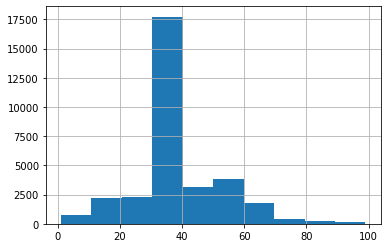

In [ ]:
#some basic plots of the data to see shape
data['hours per week'].hist()
print("Histogram of hours per week")

histogram of age


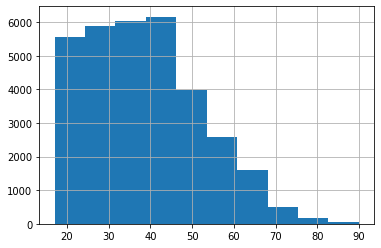

In [ ]:
#some basic plots of the data to see shape
data['age'].hist()
print('histogram of age')
#working age data seems skewed may benifit from using normalisation transform 

0    24719
1     7841
Name: income, dtype: int64

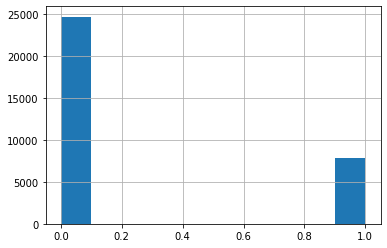

In [ ]:
##some basic plots of the data to see shape
data['income'].hist()
#noted unlabanced class data, this may need to be rebalanced using ressamplin tools such as SMOTE.
data['income'].value_counts()

In [ ]:
# createing our X an y by selecting the columns
y= data.drop(columns=["age"	, "gender", "educational-num"	,"capital gain"	,"capital loss"	,"hours per week"])
X = data.drop(columns=["income"])

In [ ]:
#splitting this data to train and test dataset 80% to 20%
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [ ]:
#converting data to nd numpy array and flattening the labels 
y_train = y_train.to_numpy().ravel()
X_train = X_train.to_numpy()
y_test = y_test.to_numpy().ravel()
X_test = X_test.to_numpy()

In [ ]:
#using our preceptron class to fit and predict
p= Perceptron(learning_rate=0.001, epochs=150)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
print("Accuracy is : ", acc(y_test, y_pred))
#checking confusion matrix
print('confusion matrix\n', confusion_matrix(y_test, y_pred))

Starting weights [0. 0. 0. 0. 0. 0.]
Starting bias weight 0
Final weights [ 1.2000e-02  7.7000e-01 -3.2710e+00  9.2057e+01 -1.5890e+00  2.1000e-02]
Final bias weight -16.67099999999739
Accuracy is :  0.7900798525798526
confusion matrix
 [[4789  181]
 [1186  356]]


The model perfomed ok, for 150 epochs and learning rate 0.001 we have accuracy 0.79 however we can see the confusion matrix we can see the false negative rate is high most likely due to unbalaned data.

In [ ]:
# since dataset is not balanced we will use SMOTE here to randomly resample and balance the binary class more 
oversample = SMOTE()
X_1, y_1 = oversample.fit_resample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# checking what SMOTE did to our data
print('original X shape:' ,X.shape,  'transfoemd X_1 shape:' ,X_1.shape)
print('original y shape:' ,y.shape,  'transfoemd y_1 shape:' ,y_1.shape)
print('original class balance: ', np.unique(y, return_counts=True), 'smote transform class balance', np.unique(y_1, return_counts=True))

original X shape: (32560, 6) transfoemd X_1 shape: (49438, 6)
original y shape: (32560, 1) transfoemd y_1 shape: (49438,)
original class balance:  (array([0, 1]), array([24719,  7841])) smote transform class balance (array([0, 1]), array([24719, 24719]))


In [ ]:
#splitting this data to train and test dataset 80% to 20%
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1,y_1, test_size=0.2, random_state=123)

In [ ]:
#using our preceptron class to fit and predict on balanced data 
p= Perceptron(learning_rate=0.001, epochs=50)
p.fit(X_1train, y_1train)
y_1pred = p.predict(X_1test)
print("Accuracy is : ", acc(y_1test, y_1pred))
#checking confusion matrix
print('confusion matrix\n', confusion_matrix(y_1test, y_1pred))

Starting weights [0. 0. 0. 0. 0. 0.]
Starting bias weight 0
Final weights [ 0.098  0.627 -3.257  8.305  0.689  0.043]
Final bias weight -12.369999999998583
Accuracy is :  0.7633495145631068
confusion matrix
 [[3760 1157]
 [1183 3788]]


We can see the false negative rate has reduced and we have a better true positive and and true negative prediction using SMOTE. 

In [ ]:
#100 epochs 
p= Perceptron(learning_rate=0.001, epochs=100)
p.fit(X_1train, y_1train)
y_1pred = p.predict(X_1test)
print("Accuracy is : ", acc(y_1test, y_1pred))
#checking confusion matrix
print('confusion matrix\n', confusion_matrix(y_1test, y_1pred))

Starting weights [0. 0. 0. 0. 0. 0.]
Starting bias weight 0
Final weights [ 0.101  0.681 -3.364  8.308  0.612  0.035]
Final bias weight -13.63999999999788
Accuracy is :  0.7385720064724919
confusion matrix
 [[4118  799]
 [1786 3185]]


In [ ]:
#500 epochs apporx 5 min running time 
p= Perceptron(learning_rate=0.001, epochs=500)
p.fit(X_1train, y_1train)
y_1pred = p.predict(X_1test)
print("Accuracy is : ", acc(y_1test, y_1pred))
#checking confusion matrix
print('confusion matrix\n', confusion_matrix(y_1test, y_1pred))

Starting weights [0. 0. 0. 0. 0. 0.]
Starting bias weight 0
Final weights [ 0.102  0.703 -3.381  8.516  0.614  0.053]
Final bias weight -13.894999999997738
Accuracy is :  0.7604166666666666
confusion matrix
 [[3815 1102]
 [1267 3704]]


# Conclusion:

we were able to test our Perceptron model which was built from scrtach using python code. The model perfomed very well on test blob data.
We also tested on UCI adult income dataset which perfomed well also.
the accuracy is around 73% which is good without much tuning. This can be improved further with grid search methods to find best lr and epoch combo, also early stopping feature might help save time with running too many epochs and overfitting. 